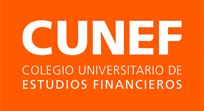

# Máster en Data Science - Machine Learning

# Predicción de fraude mediante el uso de modelos de Machine Learning
##### <font color='dodgerblue' face='Montserrat'>Autor: Rodrigo Fernandez Campos</font>
## DataSet: Bank Account Fraud Dataset Suite (NeurIPS 2022)

# <font size=25><b>Implementación del modelo elegido: <font color='gold'>Light</font><font color='deepskyblue'>GBM</font></b></font>

In [201]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from termcolor import colored, cprint
from sklearn.preprocessing import StandardScaler
import warnings
import sys

import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import lightgbm
from lightgbm.sklearn import LGBMClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.metrics import balanced_accuracy_score, fbeta_score, make_scorer,\
                            accuracy_score,average_precision_score, precision_recall_curve, roc_curve,\
                            auc, recall_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

import pickle
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Funciones

In [71]:
sys.path.append('../src/')
import functions_rfc as fr
sys.path.remove('../src/')

### Constantes:
seed=10

***
# Importo datasets procesados con anterioridad

In [72]:
df_fraud_train = pd.read_csv('../data/processed/df_train_undersamp_ready.csv')
df_fraud_test = pd.read_csv('../data/processed/df_test_cut_ready_to_model.csv')

df_fraud_train.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,device_os_other,device_os_linux,device_os_windows,device_os_macintosh,device_os_x11,keep_alive_session,device_distinct_emails_8w,month,fraud_bool
0,0.9,0.298806,-1,180,20,0.009536,-0.875978,1.0,819,5945.947559,2,11,0.0,197,0,0.0,1,1,1500.0,0,4.961887,1,0,0,0,0,0,1,1,0
1,0.9,0.146466,351,5,40,0.039689,-0.918274,1.0,820,5169.981337,8,9,0.0,40,0,1.0,1,0,200.0,0,5.241980,0,1,0,0,0,0,1,2,0
2,0.2,0.917009,-1,113,40,0.015644,-1.032241,2.0,3476,4706.497837,0,6,0.0,135,0,0.0,0,0,500.0,0,8.195009,0,1,0,0,0,0,1,3,0
3,0.4,0.446157,38,18,30,0.006393,50.582683,0.0,1957,5584.932003,7,20,0.0,135,0,4.0,0,0,1500.0,0,4.524850,0,0,1,0,0,1,1,2,0
4,0.8,0.991005,11,6,40,0.006078,-0.619936,1.0,558,4434.986066,7,10,0.0,187,0,0.0,0,0,1000.0,0,5.737804,0,1,0,0,0,0,1,4,0


In [73]:
X_train = df_fraud_train.drop('fraud_bool', axis=1)
y_train = df_fraud_train['fraud_bool']

X_test = df_fraud_test.drop('fraud_bool', axis=1)
y_test = df_fraud_test['fraud_bool']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((104220, 29), (104220,), (300000, 29), (300000,))

# Entrenamiento del modelo

Entrenamos el modelo con los hiperparámetros seleccionados mediante el RandomSearchCV

In [74]:
cv = load('../models/CV_lgbm.joblib')

In [75]:
cv.best_params_

{'num_leaves': 171,
 'n_estimators ': 500,
 'min_data_in_leaf': 1600,
 'max_depth': 10,
 'learning_rate': 0.05}

In [76]:
%%time
lgbm = LGBMClassifier(num_leaves=171\
                      ,n_estimators=500\
                      ,min_data_in_leaf=1600\
                      ,max_depth=10\
                      ,learning_rate=0.05
                      ,verbosity=-1)

lgbm.fit(X_train,y_train)

CPU times: total: 17.9 s
Wall time: 8.85 s


LGBMClassifier(learning_rate=0.05, max_depth=10, min_data_in_leaf=1600,
               n_estimators=500, num_leaves=171, verbosity=-1)

In [77]:
y_pred = lgbm.predict(X_test)

# Hacer función de esto:

In [312]:
print(f'''Accuracy: {accuracy_score(y_test,y_pred):.5f}
Balanced Accuracy: {balanced_accuracy_score(y_test,y_pred):.5f}
\033[1mF2 score: {fbeta_score(y_test,y_pred, beta=2):.5f}\033[0m
\033[1mF1 score: {f1_score(y_test,y_pred):.5f}\033[0m
Precision: {precision_score(y_test,y_pred):.5f}
Recall: {recall_score(y_test,y_pred):.5f}''')

Accuracy: 0.97893
Balanced Accuracy: 0.64285
F2 score: 0.27158
F1 score: 0.23855
Precision: 0.19836
Recall: 0.29918


In [79]:
y_pred_proba = lgbm.predict_proba(X_test)
y_pred_proba

array([[0.94641127, 0.05358873],
       [0.99289789, 0.00710211],
       [0.75620039, 0.24379961],
       ...,
       [0.95211909, 0.04788091],
       [0.97011441, 0.02988559],
       [0.97134907, 0.02865093]])

In [127]:
proba_tags = pd.concat([pd.Series(y_pred_proba[:,1]),pd.Series(y_pred)],axis=1).rename(columns={0:'Probability', 1:'Tag'})
proba_tags[proba_tags.Tag == 1].Probability.describe()

count    4991.000000
mean        0.648107
std         0.110595
min         0.500028
25%         0.555498
50%         0.623766
75%         0.724833
max         0.980931
Name: Probability, dtype: float64

In [128]:
y_pred_train = lgbm.predict(X_train)
y_pred_proba_train = lgbm.predict_proba(X_train)

# Resumen métricas

***

# ROC Curve


In [369]:
def plot_roc_gini(y_true=None, y_pred=None, ax=ax, title='ROC Curve', model_name='Light GBM'):

    if ((y_true is None) or (y_pred is None)):
        print(u'\nFaltan parámetros por pasar a la función')
        return 1

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix], gmeans[ix]))
    
    ax.plot(fpr, tpr, marker='.', color='dodgerblue', lw=2, label=f'{model_name} (area = %0.3f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='crimson', lw=3, linestyle='--', label='No Skill')
    plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best', zorder=2)
    ax.set_xlim([-0.025, 1.025])
    ax.set_ylim([-0.025, 1.025])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title, fontdict={'fontsize':18})
    ax.legend(loc="lower right")
    ax.grid(alpha=0.5)

    gini = (2.0 * roc_auc) - 1.0

    print('\n*************************************************************')
    print(u'\nEl coeficiente de GINI es: %0.2f' % gini)
    print(u'\nEl área por debajo de la curva ROC es: %0.4f' %roc_auc)
    print('\n*************************************************************')

Best Threshold = 0.071743, G-Mean = 0.815

*************************************************************

El coeficiente de GINI es: 0.79

El área por debajo de la curva ROC es: 0.8953

*************************************************************


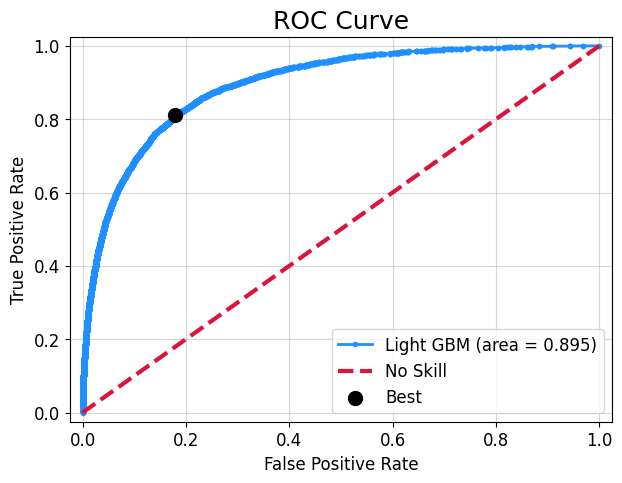

In [370]:
fig, ax = plt.subplots(figsize=(7,5))
plot_roc_gini(y_test, y_pred_proba[:,1], ax=ax, model_name='Light GBM')
plt.show()

# Precision - Recall Curve

In [371]:
def precision_recall_curve_plot(y_true, y_pred_proba, ax, title='Precision-Recall Curve', f_score_beta=1, model_name='Light GBM'):
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)

    f_score = ((1+(f_score_beta**2)) * precision * recall) / ((f_score_beta**2) * precision + recall)
    ix = np.argmax(f_score)
    print(f'Best Threshold=%f, F{f_score_beta} Score=%.3f' % (thresholds[ix], f_score[ix]))
    
    #plt.ylim([0,1])
    no_skill= len(y_true[y_true==1])/len(y_true)
    ax.plot([0,1],[no_skill, no_skill], linestyle='--', label='No Skill', color='crimson', lw=3)
    ax.plot(recall, precision, marker='.', label=model_name, color='dodgerblue')
    ax.scatter(recall[ix], precision[ix], s=100, marker='o', color='black', label=f'Best', zorder=2)
    ax.set_title(str(title), fontdict={'fontsize':18})
    ax.set_ylim([0,1.01])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend()
    ax.grid(alpha=0.5)

Best Threshold=0.345435, F2 Score=0.308


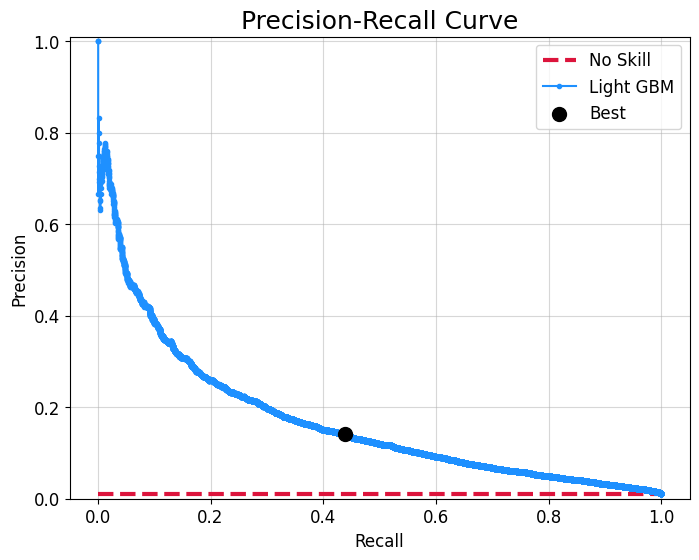

In [372]:
fig, ax = plt.subplots(figsize=(8,6))
#precision_recall_curve_plot(y_train, y_pred_proba_train[:,1], ax=ax1, title='TRAIN', f_score_beta=2, model_name='Light GBM') # No son comparables!
precision_recall_curve_plot(y_test, y_pred_proba[:,1], ax=ax, f_score_beta=2, model_name='Light GBM')

# Cumulative Gain Curve

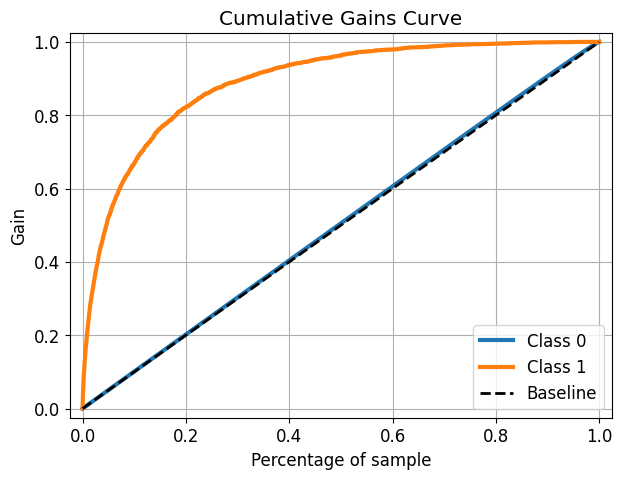

In [364]:
fig, ax = plt.subplots(figsize=(7,5))
skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba, ax=ax)
ax.set_xlim([-0.025, 1.025])
ax.set_ylim([-0.025, 1.025])
plt.show()

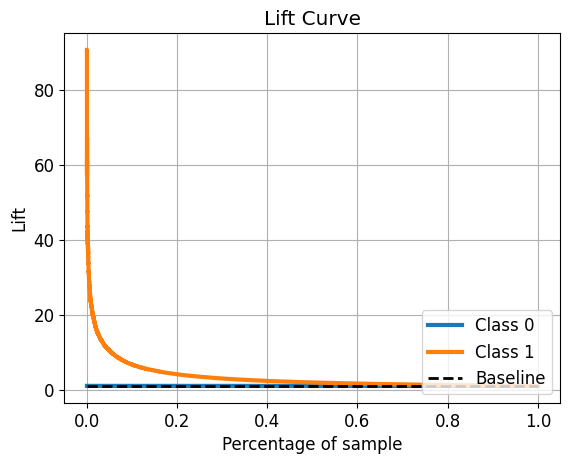

In [297]:
skplt.metrics.plot_lift_curve(y_test, y_pred_proba)
plt.show()

In [290]:
%%time
prob_predictions = y_pred_proba[:,1]
recall_precision = []

for threshold in np.arange(0.01, 0.99, 0.01):
    given_threshold = [1 if value>threshold else 0 for value in prob_predictions]
    recall_precision.append([threshold, recall_score(y_test, given_threshold)
                            ,precision_score(y_test, given_threshold)
                            ,fbeta_score(y_test, given_threshold, beta=2)])

CPU times: total: 1min 20s
Wall time: 2min 19s


In [373]:
def plot_recall_precission(recall_precision):

    plt.figure(figsize=(15, 5))
    ax = sns.pointplot(x = [round(element[0],2) for element in recall_precision], y=[element[1] for element in recall_precision],
                     color="red", label='Recall', scale=1)
    ax = sns.pointplot(x = [round(element[0],2) for element in recall_precision], y=[element[2] for element in recall_precision],
                     color="blue", label='Precission')
    ax = sns.pointplot(x = [round(element[0],2) for element in recall_precision], y=[element[3] for element in recall_precision],
                     color="gold", label='F2 Score')
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
    f_score = ((1+(2**2)) * precision * recall) / ((2**2) * precision + recall)
    ix = np.argmax(f_score)
    
    ax.scatter((round(thresholds[ix],2)*100), f_score[ix], s=100, marker='o', color='black', label=f'Best (th={thresholds[ix]:.3f}, f2={f_score[ix]:.3f})', zorder=2)
    ax.set_title('Recall, Precision & F2 VS Threshold')
    ax.set_xlabel('threshold')
    ax.set_ylabel('probability')
    ax.legend(loc="upper center")
    
    labels = ax.get_xticklabels()
    for i,l in enumerate(labels):
        if(i%5 == 0) or (i%5 ==1) or (i%5 == 2) or (i%5 == 3):
            labels[i] = '' # skip even labels
            ax.set_xticklabels(labels, rotation=45, fontdict={'size': 10})
    plt.show()

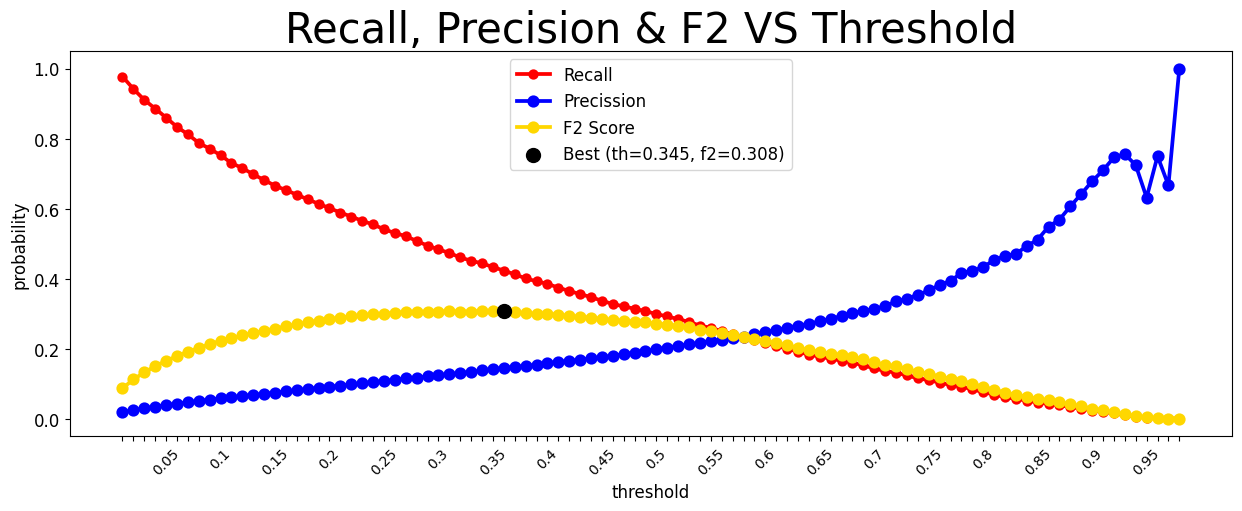

In [374]:
plot_recall_precission(recall_precision)

# Confusion Matrix

# Hacer Función de esto!

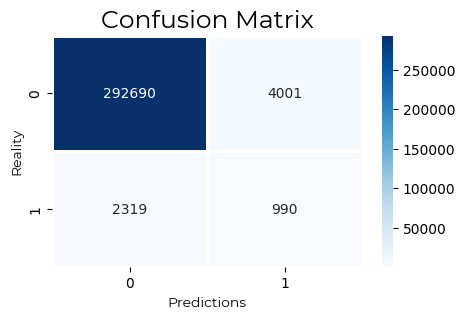

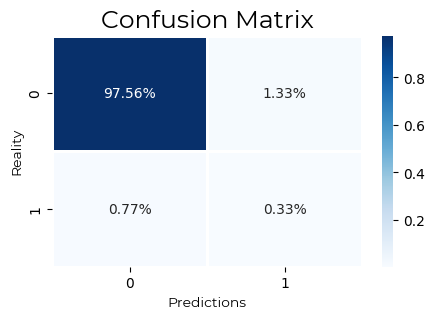

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_perc = conf_matrix/np.sum(conf_matrix)

fig, ax = plt.subplots(figsize=(5,3))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', linewidth=2, ax=ax)
ax.set_xlabel('Predictions', fontdict={'fontname':'Montserrat'})
ax.set_ylabel('Reality', fontdict={'fontname':'Montserrat'})
ax.set_title('Confusion Matrix', fontdict={'fontname':'Montserrat', 'fontsize':18})
plt.show()

fig, ax = plt.subplots(figsize=(5,3))
heatmap = sns.heatmap(conf_matrix_perc, annot=True, fmt='.2%', cmap='Blues', linewidth=2, ax=ax)
ax.set_xlabel('Predictions', fontdict={'fontname':'Montserrat'})
ax.set_ylabel('Reality', fontdict={'fontname':'Montserrat'})
ax.set_title('Confusion Matrix', fontdict={'fontname':'Montserrat', 'fontsize':18})
plt.show()



#plt.figure(figsize=(9,9))
#sns.heatmap(cm_gbt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
#plt.ylabel('Actual label');

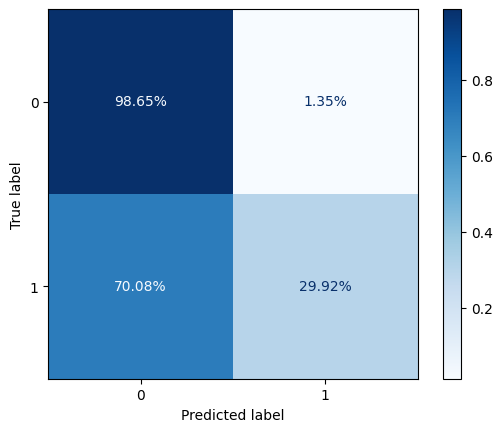

In [68]:
ConfusionMatrixDisplay(confusion_matrix).from_predictions(y_test,y_pred, cmap='Blues', normalize='true', values_format='.2%')